<a href="https://colab.research.google.com/github/ctseng40/DSLearn/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression in Python with Scikit-Learn
Reference: https://medium.com/analytics-vidhya/linear-regression-in-python-with-scikit-learn-e1bb8a059cd2 \
Notes: In this regression task we will predict the Sales Price based upon the Square Feet of the house. This is a simple linear regression task as it involves just two variables

In [3]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [4]:
# Import the dataset
df = pd.read_csv('HousingPrices.csv')

FileNotFoundError: ignored

In [12]:
# Explore the data
df.shape

(1460, 2)

In [14]:
df.info

<bound method DataFrame.info of       SquareFeet  SalePrice
0           1710     208500
1           1262     181500
2           1786     223500
3           1717     140000
4           2198     250000
...          ...        ...
1455        1647     175000
1456        2073     210000
1457        2340     266500
1458        1078     142125
1459        1256     147500

[1460 rows x 2 columns]>

In [4]:
# retrieve the first 5 records from the dataset
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [5]:
# check the statistical details
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


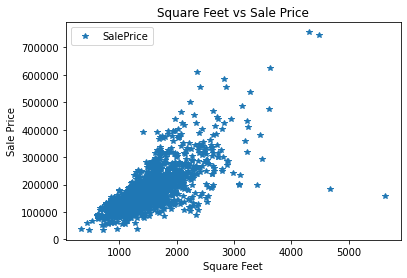

In [15]:
# plot the data to see if there is any relationship
df.plot(x='SquareFeet', y='SalePrice', style='*')
plt.title('Square Feet vs Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()

In [16]:
# Divide the data into 'independent variables' and 'dependent variable'
x = df.iloc[:, :-1].values # specify '-1' as the range for column to exclude last column
y = df.iloc[:, 1].values # the column index for 'SalesPrice' 1

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [31]:
lr = LinearRegression().fit(X_train, y_train)
get_cv_scores(lr)
print(lr.intercept_)
print(lr.coef_)

#lr = LinearRegression()
#cross_val_score(lr, x, y, cv=10)

CV Mean:  0.5147052949885541
STD:  0.06563558755274343


13330.293444921088
[110.26434426]


In [33]:
# Prediction
y_pred = lr.predict(X_test)

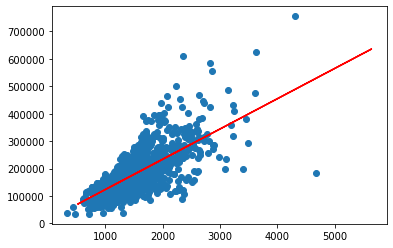

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [35]:
# Compare actual output values for X_test with predicted values
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df.head()

,Actual,Predicted
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377


In [36]:
# Evaluation
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
# Mean Squared Error (MSE) is the mean of the squared errors.
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 39364.76724953735
Mean Squared Error: 3913788296.4027987
Root Mean Squared Error: 62560.277304394986


# Verifying the Assumptions of Linear Regression in Python
Reference: https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0 \\

In [5]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [6]:
# Load Data
boston = load_boston()
#print(boston)
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.drop('CHAS', axis = 1, inplace=True)
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y = pd.Series(boston.target, name='MEDV')

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
Intercept: 36.891959796932426
R^2 score: 0.7355165089722999


According to the Gauss-Markov theorem, in a linear regression model the ordinary least squares (OLS) estimator gives the best linear unbiased estimator (BLUE) of the coefficients, provided that:
- the expectation of errors (residuals) is 0
- the errors are uncorrelated
- the errors have equal variance — homoscedasticity of errors

**Linearity of the model**
The dependent variable (y) is assumed to be a linear function of the independent variable (X, features) specified in the model.

In [12]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Fri, 01 Oct 2021   Prob (F-statistic):          7.30e-134
Time:                        20:06:55   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

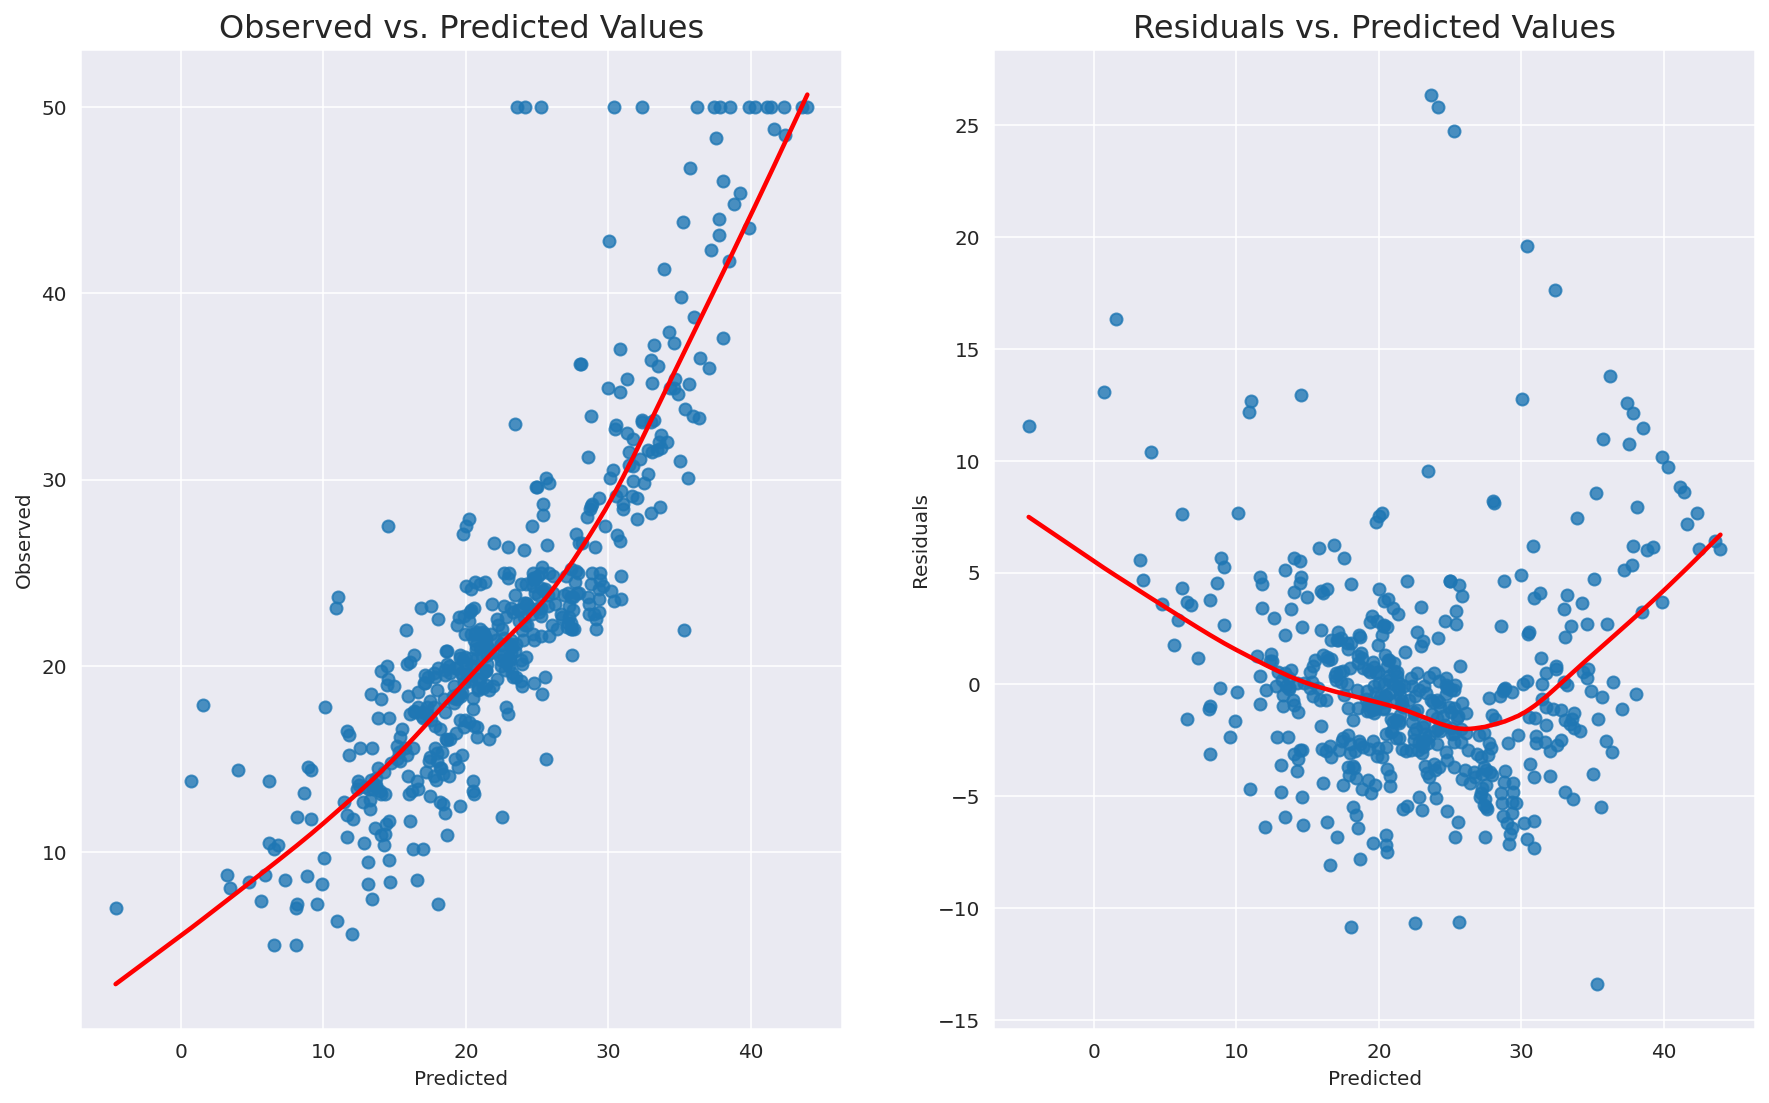

In [13]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)   

Expectation (mean) of residuals is zero

In [14]:
lin_reg.resid.mean()

-4.850577559287206e-14

**No (perfect) multicollinearity**\
In other words, the features should be linearly independent.\
We can detect multicollinearity using the variance inflation factor (VIF). Without going into too many details, the interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.787705,2.298257,3.949246,4.388775,1.931865,3.092832,3.954961,7.397844,8.876233,1.783302,1.344971,2.931101


To deal with multicollinearity we should iteratively remove features with high values of VIF. A rule of thumb for removal could be VIF larger than 10 (5 is also common). Another possible solution is to use PCA to reduce features to a smaller set of uncorrelated components.

**Homoscedasticity (equal variance) of residuals**\
When residuals do not have constant variance (they exhibit heteroscedasticity), 
it is difficult to determine the true standard deviation of the forecast errors,
 usually resulting in confidence intervals that are too wide/narrow.


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  6.028613e+01
p-value                        2.001794e-08
f-value                        5.556828e+00
f p-value                      5.935449e-09

 Goldfeld-Quandt test ----
                    value
F statistic  2.620956e+00
p-value      1.251137e-13

 Residuals plots ----


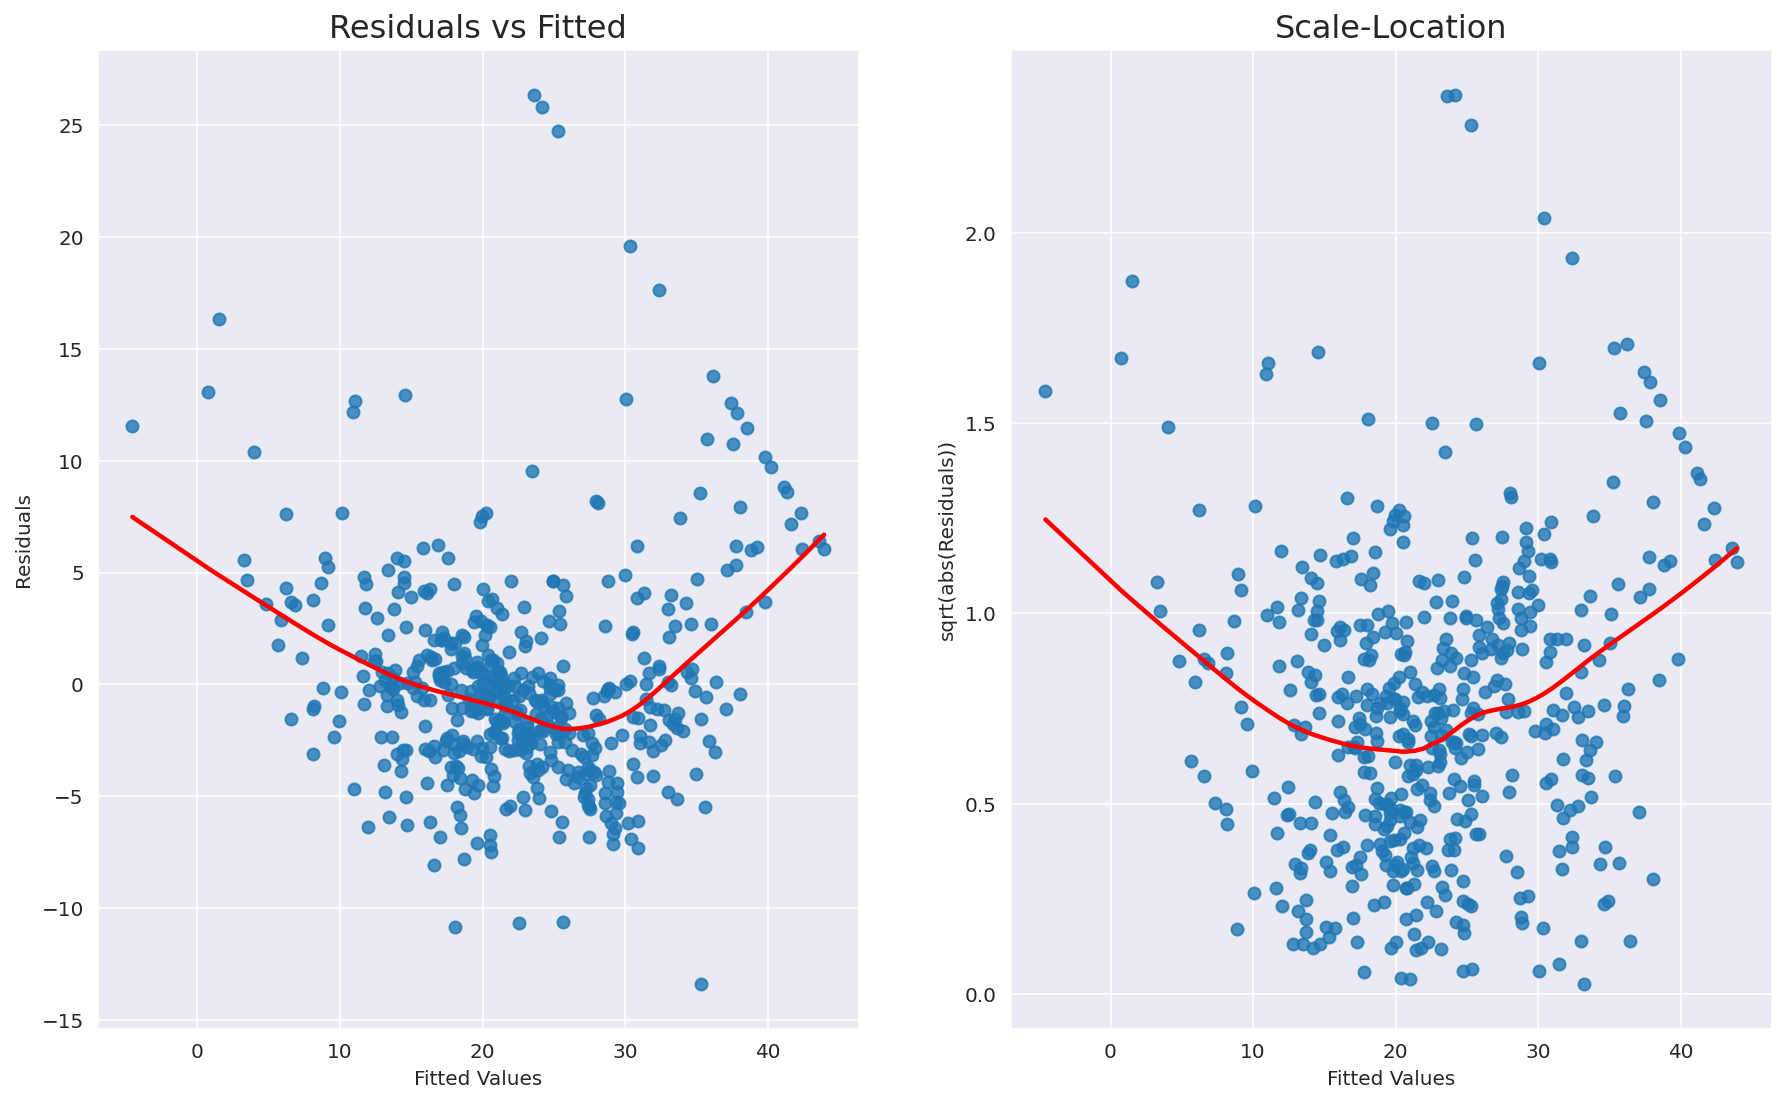

In [16]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

To identify homoscedasticity in the plots, the placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible — the red line in the R plots should be flat. We can see that this is not the case for our dataset.

**No autocorrelation of residuals**
This assumption is especially dangerous in time-series models, where serial correlation in the residuals implies that there is room for improvement in the model.

**Normality of residuals**

Jarque-Bera test ---- statistic: 898.3521, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8953, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3283, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.9109, 5% critical value: 0.7810
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


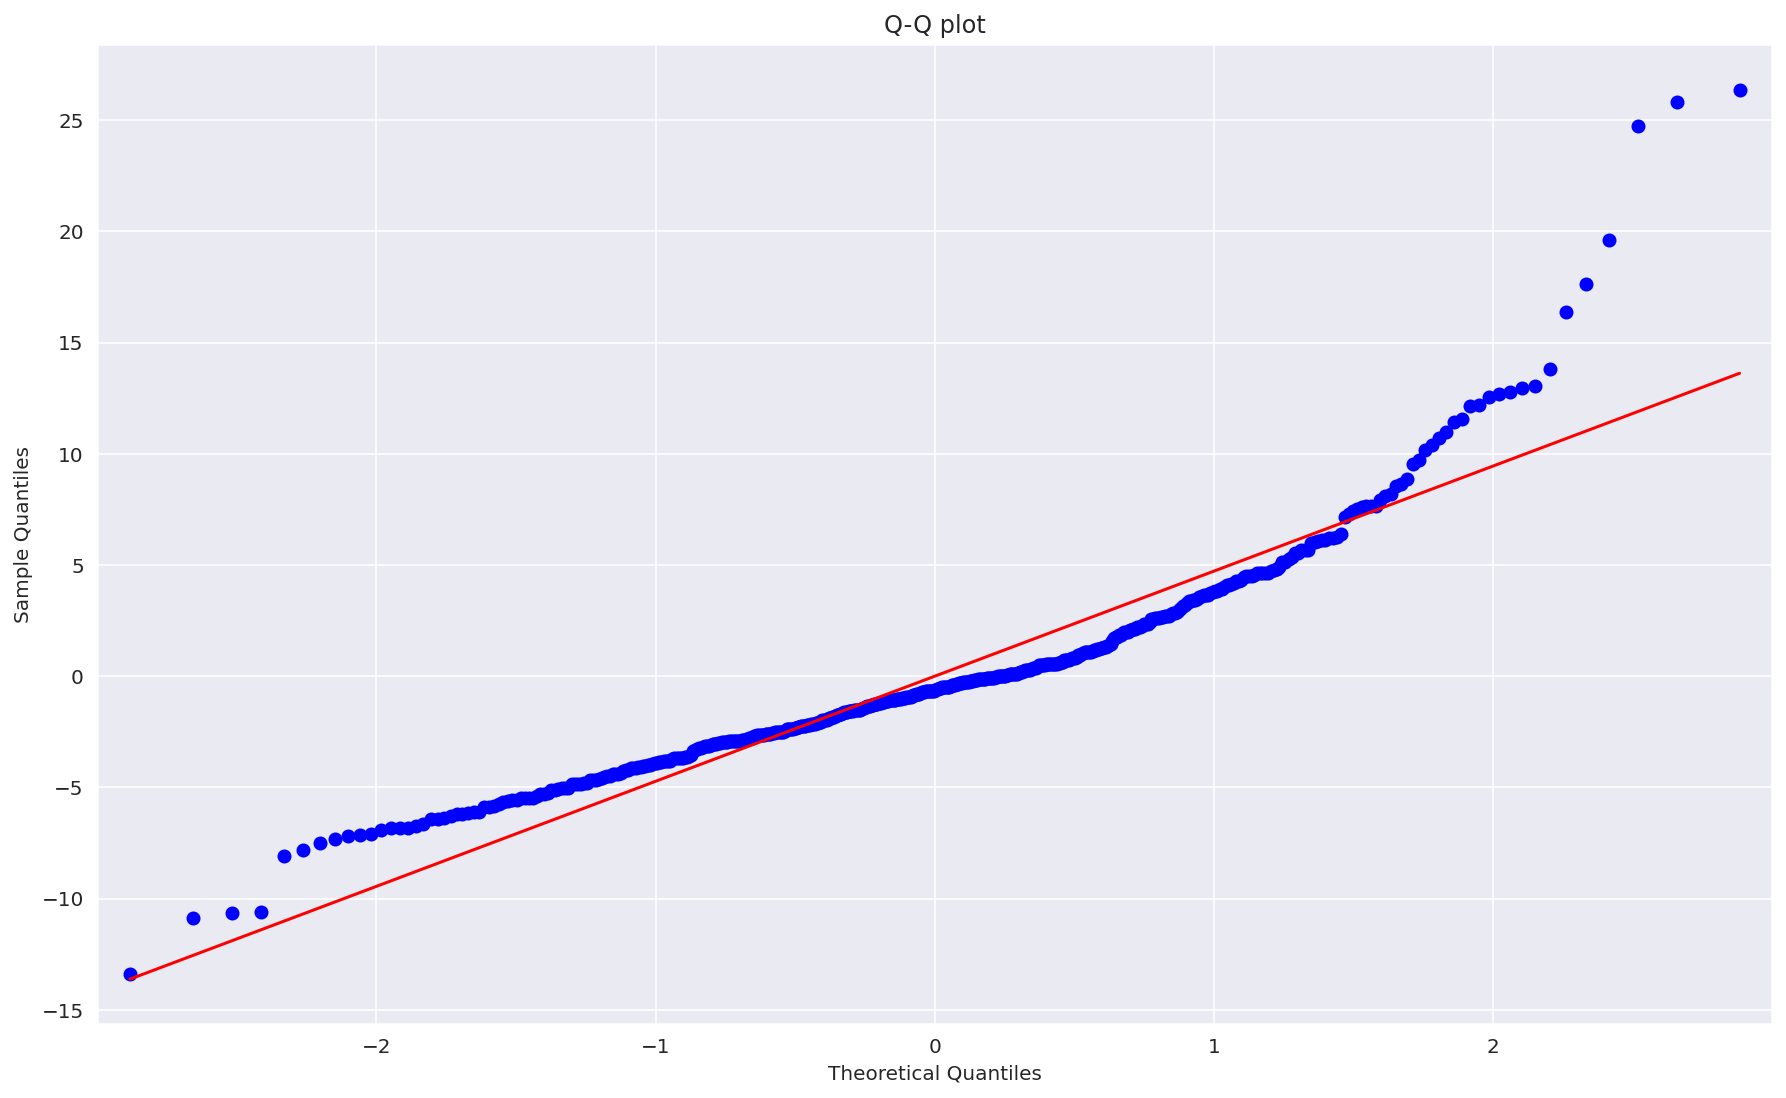

In [17]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)